<a href="https://colab.research.google.com/github/mmmmiikkkka/my-macro-project/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

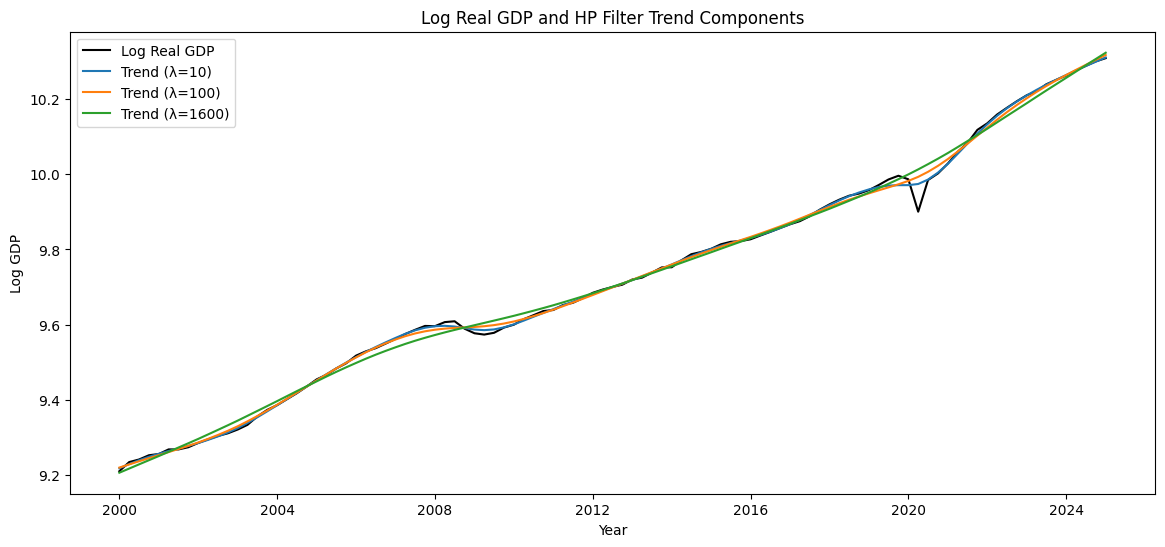

In [5]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np

gdp = web.DataReader('GDP', 'fred', start='2000-01-01')
gdp = gdp.dropna()

# Change 'GDPC1' to 'GDP' to match the actual column name
gdp['log_GDP'] = np.log(gdp['GDP'])

from statsmodels.tsa.filters.hp_filter import hpfilter
lambdas = [10, 100, 1600]
results = {}

for lam in lambdas:
    cycle, trend = hpfilter(gdp['log_GDP'], lamb=lam)
    results[lam] = {'trend': trend, 'cycle': cycle}

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(gdp.index, gdp['log_GDP'], label='Log Real GDP', color='black')

for lam in lambdas:
    plt.plot(gdp.index, results[lam]['trend'], label=f'Trend (λ={lam})')

plt.title('Log Real GDP and HP Filter Trend Components')
plt.xlabel('Year')
plt.ylabel('Log GDP')
plt.legend()



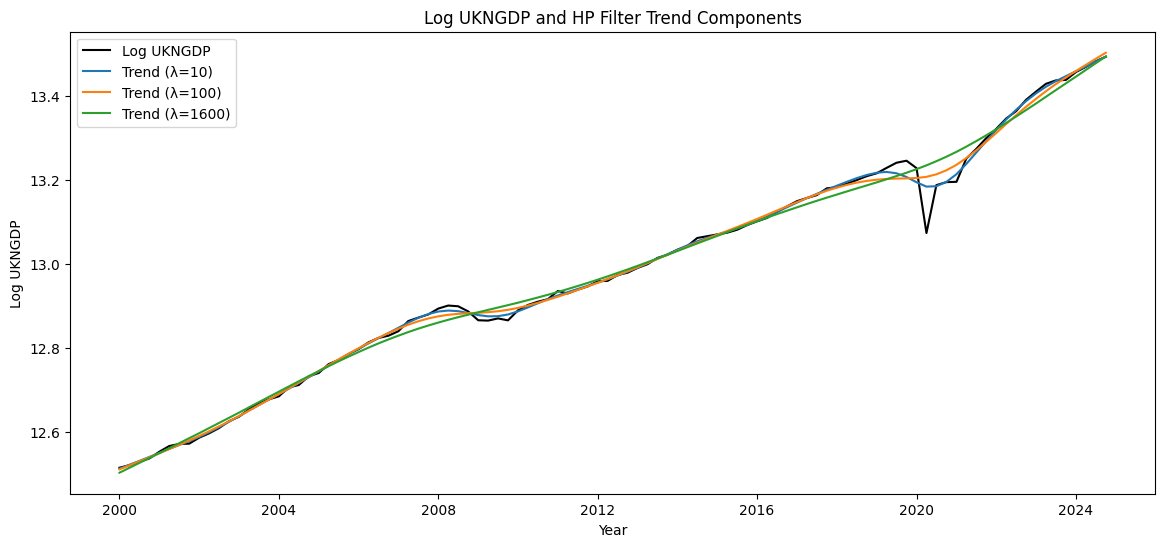

In [11]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np

gdp = web.DataReader('UKNGDP', 'fred', start='2000-01-01')
gdp = gdp.dropna()

# Change 'GDPC1' to 'GDP' to match the actual column name
gdp['log_UKNGDP'] = np.log(gdp['UKNGDP'])

from statsmodels.tsa.filters.hp_filter import hpfilter
lambdas = [10, 100, 1600]
results = {}

for lam in lambdas:
    cycle, trend = hpfilter(gdp['log_UKNGDP'] , lamb=lam)
    results[lam] = {'trend': trend, 'cycle': cycle}

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(gdp.index, gdp['log_UKNGDP'], label='Log UKNGDP', color='black')

for lam in lambdas:
    plt.plot(gdp.index, results[lam]['trend'], label=f'Trend (λ={lam})')

plt.title('Log UKNGDP and HP Filter Trend Components')
plt.xlabel('Year')
plt.ylabel('Log UKNGDP')
plt.legend()